In [33]:
import os
os.chdir('/Users/perinik/github.com/NikhilPeri/steel-defect-detection')
import pandas as pd
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt
from functools import reduce

from utils.conversion import rle_to_mask, mask_to_rle

%matplotlib inline
CLASSIFICATIONS=[
    ('results/segmentation_submissions/0.88892.csv', 0.88892),
    ('results/segmentation_submissions/0.88902.csv', 0.88902),
    ('results/segmentation_submissions/0.89072.csv', 0.89072)
]

In [58]:
def clean_segmentation(i, df):
    df.columns = ('ImageId_ClassId', 'encoded_pixels_' + str(i))
    df['label_' + str(i)] = df['encoded_pixels_' + str(i)].isna()
    return df
 

results = [clean_segmentation(i, pd.read_csv(r[0])) for i, r in enumerate(CLASSIFICATIONS)]
res = reduce(lambda l,r: pd.merge(l, r, on=['ImageId_ClassId'], how='inner'), results)
res.fillna('')

,ImageId_ClassId,encoded_pixels_0,label_0,encoded_pixels_1,label_1,encoded_pixels_2,label_2
0,b51cdf84f.jpg_1,,True,,True,,True
1,b51cdf84f.jpg_2,,True,,True,,True
2,b51cdf84f.jpg_3,,True,,True,,True
3,b51cdf84f.jpg_4,,True,30 42 286 42 542 42 798 42 1054 42 1310 42 156...,False,30 42 286 42 542 42 798 42 1054 42 1310 42 156...,False
4,d5e8bbe9a.jpg_1,,True,,True,,True
5,d5e8bbe9a.jpg_2,,True,,True,,True
6,d5e8bbe9a.jpg_3,,True,,True,,True
7,d5e8bbe9a.jpg_4,28886 28 29142 28 29398 28 29654 28 29910 28 3...,False,28886 28 29142 28 29398 28 29654 28 29910 28 3...,False,28886 28 29142 28 29398 28 29654 28 29910 28 3...,False
8,874f5fe53.jpg_1,,True,,True,,True
9,874f5fe53.jpg_2,,True,,True,,True


0        True
1        True
2        True
3        True
4        True
5        True
6        True
7       False
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18      False
19       True
20       True
21       True
22      False
23       True
24       True
25       True
26       True
27      False
28       True
29       True
        ...  
7174     True
7175     True
7176     True
7177     True
7178    False
7179     True
7180     True
7181     True
7182     True
7183     True
7184     True
7185     True
7186    False
7187     True
7188     True
7189     True
7190    False
7191     True
7192     True
7193     True
7194     True
7195     True
7196     True
7197     True
7198     True
7199     True
7200     True
7201     True
7202     True
7203     True
Name: encoded_pixels_0, Length: 7204, dtype: bool

In [51]:
def mode_pixels(sample):
    image = cv.imread('data/raw/test_images/'+ sample.ImageId_ClassId.split('_')[0])
    mask_1 = rle_to_mask(sample.encoded_pixels_0, image)
    mask_2 = rle_to_mask(sample.encoded_pixels_1, image)
    mask_3 = rle_to_mask(sample.encoded_pixels_2, image)
    
    masks = np.concatenate([
        mask_1[..., np.newaxis],
        mask_2[..., np.newaxis],
        mask_3[..., np.newaxis]
    ])
    return mask_to_rle(masks.mean(axis=-1))

In [52]:
def iou(m1, m2, epsilon=1e-8):
    return (np.sum(m1*m2) + epsilon) / (np.sum(m1 + m2) + epsilon)

def mean_iou(sample):
    image = cv.imread('data/raw/test_images/'+ sample.ImageId_ClassId.split('_')[0])
    mask_1 = rle_to_mask(sample.encoded_pixels_0, image)
    mask_2 = rle_to_mask(sample.encoded_pixels_1, image)
    mask_3 = rle_to_mask(sample.encoded_pixels_2, image)
    
    mask_1_mask_2 = iou(mask_1, mask_2)
    mask_1_mask_3 = iou(mask_1, mask_3)
    mask_2_mask_3 = iou(mask_2, mask_3)
    
    return np.mean([mask_1_mask_2, mask_1_mask_3, mask_2_mask_3])

In [54]:
mean_iou(res.iloc[0])

1.0

In [48]:
res

,ImageId_ClassId,encoded_pixels_0,encoded_pixels_1,encoded_pixels_2
0,b51cdf84f.jpg_1,NaN,NaN,NaN
1,b51cdf84f.jpg_2,NaN,NaN,NaN
2,b51cdf84f.jpg_3,NaN,NaN,NaN
3,b51cdf84f.jpg_4,NaN,30 42 286 42 542 42 798 42 1054 42 1310 42 156...,30 42 286 42 542 42 798 42 1054 42 1310 42 156...
4,d5e8bbe9a.jpg_1,NaN,NaN,NaN
5,d5e8bbe9a.jpg_2,NaN,NaN,NaN
6,d5e8bbe9a.jpg_3,NaN,NaN,NaN
7,d5e8bbe9a.jpg_4,28886 28 29142 28 29398 28 29654 28 29910 28 3...,28886 28 29142 28 29398 28 29654 28 29910 28 3...,28886 28 29142 28 29398 28 29654 28 29910 28 3...
8,874f5fe53.jpg_1,NaN,NaN,NaN
9,874f5fe53.jpg_2,NaN,NaN,NaN


In [130]:
#res['mean_iou'] = res.apply(mean_iou, axis=1)
#res['mode_pixels'] = res.apply(mode_pixels, axis=1)
res['label'] = res['label_0'] | res['label_1'] | res['label_2']

In [131]:
res

,ImageId_ClassId,encoded_pixels_0,label_0,encoded_pixels_1,label_1,encoded_pixels_2,label_2,mean_iou,mode_pixels,label
0,b51cdf84f.jpg_1,NaN,True,NaN,True,NaN,True,1.000000,None,True
1,b51cdf84f.jpg_2,NaN,True,NaN,True,NaN,True,1.000000,None,True
2,b51cdf84f.jpg_3,NaN,True,NaN,True,NaN,True,1.000000,None,True
3,b51cdf84f.jpg_4,NaN,True,30 42 286 42 542 42 798 42 1054 42 1310 42 156...,False,30 42 286 42 542 42 798 42 1054 42 1310 42 156...,False,0.166667,286 42 542 42 1054 42 1310 42 1822 42 2078 42 ...,True
4,d5e8bbe9a.jpg_1,NaN,True,NaN,True,NaN,True,1.000000,None,True
5,d5e8bbe9a.jpg_2,NaN,True,NaN,True,NaN,True,1.000000,None,True
6,d5e8bbe9a.jpg_3,NaN,True,NaN,True,NaN,True,1.000000,None,True
7,d5e8bbe9a.jpg_4,28886 28 29142 28 29398 28 29654 28 29910 28 3...,False,28886 28 29142 28 29398 28 29654 28 29910 28 3...,False,28886 28 29142 28 29398 28 29654 28 29910 28 3...,False,0.478445,86230 28 86486 28 86742 28 86998 28 87254 28 8...,False
8,874f5fe53.jpg_1,NaN,True,NaN,True,NaN,True,1.000000,None,True
9,874f5fe53.jpg_2,NaN,True,NaN,True,NaN,True,1.000000,None,True


In [68]:
res[~res['label']].sort_values('mean_iou', ascending=False)

,ImageId_ClassId,encoded_pixels_0,label_0,encoded_pixels_1,label_1,encoded_pixels_2,label_2,mean_iou,mode_pixels,label
4250,e0d3ed478.jpg_3,133250 12 133506 12 133762 12 134018 12 134274...,False,133250 12 133506 12 133762 12 134018 12 134274...,False,133250 12 133506 12 133762 12 134018 12 134274...,False,0.500000,399490 12 399746 12 400002 12 400258 12 400514...,False
3038,01b47d973.jpg_3,262601 13 262857 13 263113 13 263369 13 263625...,False,262601 13 262857 13 263113 13 263369 13 263625...,False,262601 13 262857 13 263113 13 263369 13 263625...,False,0.500000,787401 13 787657 13 787913 13 788169 13 788425...,False
3651,ffdb60677.jpg_4,251664 13 251920 13 252176 13 252432 13 252688...,False,251664 13 251920 13 252176 13 252432 13 252688...,False,251664 13 251920 13 252176 13 252432 13 252688...,False,0.500000,754960 13 755216 13 755472 13 755728 13 755984...,False
1439,58f22628e.jpg_4,194064 13 194320 13 194576 13 194832 13 195088...,False,194064 13 194320 13 194576 13 194832 13 195088...,False,194064 13 194320 13 194576 13 194832 13 195088...,False,0.500000,582160 13 582416 13 582672 13 582928 13 583184...,False
1306,a301b86f5.jpg_3,244453 14 244709 28 244965 28 245221 28 245477...,False,244453 14 244709 28 244965 28 245221 28 245477...,False,244453 14 244709 28 244965 28 245221 28 245477...,False,0.500000,732901 14 733157 14 733413 14 733669 28 733925...,False
3906,fa5900edc.jpg_3,64954 42 65210 42 65466 42 65722 42 65978 42 6...,False,64954 42 65210 42 65466 42 65722 42 65978 42 6...,False,64954 42 65210 42 65466 42 65722 42 65978 42 6...,False,0.500000,194490 42 194746 42 195002 42 195258 42 195514...,False
4514,fb47d1546.jpg_3,39838 85 40094 85 40350 85 40606 85 40862 85 4...,False,39838 85 40094 85 40350 85 40606 85 40862 85 4...,False,39838 85 40094 85 40350 85 40606 85 40862 85 4...,False,0.500000,119198 85 119454 85 119710 85 119966 85 120222...,False
6274,352c702f6.jpg_3,338105 29 338361 29 338617 29 338873 29 339129...,False,338105 29 338361 29 338617 29 338873 29 339129...,False,338105 29 338361 29 338617 29 338873 29 339129...,False,0.500000,1013945 29 1014201 29 1014457 29 1014713 29 10...,False
2742,0bdfd29ba.jpg_3,154753 42 155009 42 155265 42 155521 42 155777...,False,154753 42 155009 42 155265 42 155521 42 155777...,False,154753 42 155009 42 155265 42 155521 42 155777...,False,0.500000,464001 42 464257 42 464513 42 464769 42 465025...,False
3118,7e104caad.jpg_3,269426 29 269669 42 269925 42 270181 42 270437...,False,269426 29 269669 42 269925 42 270181 42 270437...,False,269426 29 269669 42 269925 42 270181 42 270437...,False,0.500000,808050 29 808306 29 808562 29 808805 42 809061...,False


In [70]:
from utils.data import display_sample

Using TensorFlow backend.


In [111]:
def get_mask(pixels, image):
    return np.concatenate([
        np.zeros(shape=(image.shape[0], image.shape[1], 1)),
        pixels[..., np.newaxis],
        np.zeros(shape=(image.shape[0], image.shape[1], 1)),
        np.zeros(shape=(image.shape[0], image.shape[1], 1)),
    ], axis=-1)

def show(sample):
    image = cv.imread('data/raw/test_images/'+ sample.ImageId_ClassId.split('_')[0])
    mask_1 = rle_to_mask(sample.encoded_pixels_0, image)
    mask_2 = rle_to_mask(sample.encoded_pixels_1, image)
    mask_3 = rle_to_mask(sample.encoded_pixels_2, image)
    mm = rle_to_mask(sample.mode_pixels, image)
    plt.figure(1, figsize=(20, 30))
    display_sample(image, get_mask(mask_1, image))
    plt.figure(2, figsize=(20, 30))
    display_sample(image, get_mask(mask_2, image))
    plt.figure(3, figsize=(20, 30))
    display_sample(image, get_mask(mask_3, image))
    plt.figure(4, figsize=(20, 30))
    display_sample(image, get_mask(mm, image))

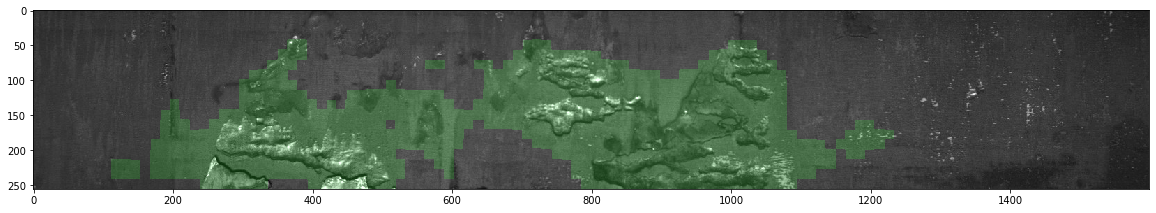

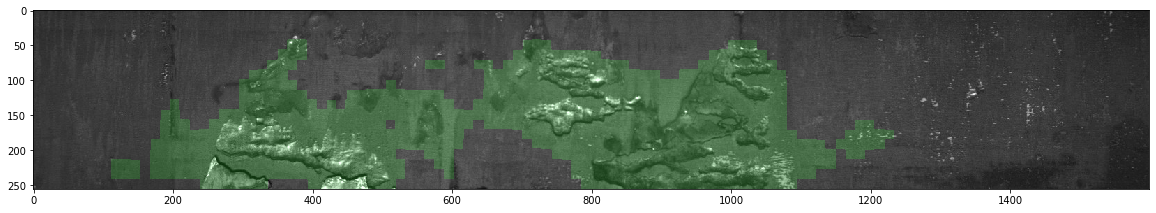

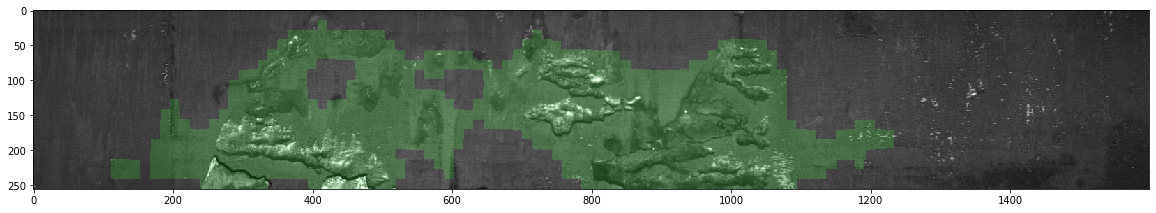

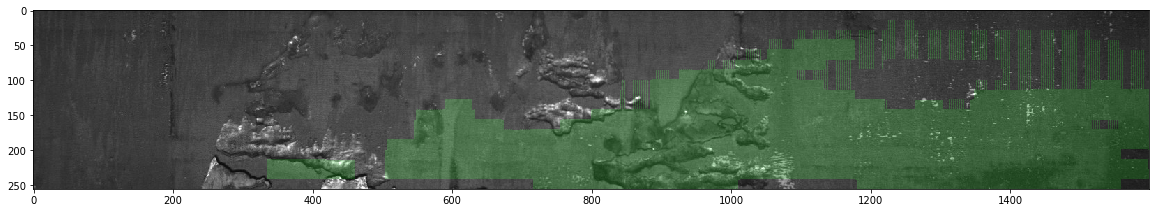

cls1


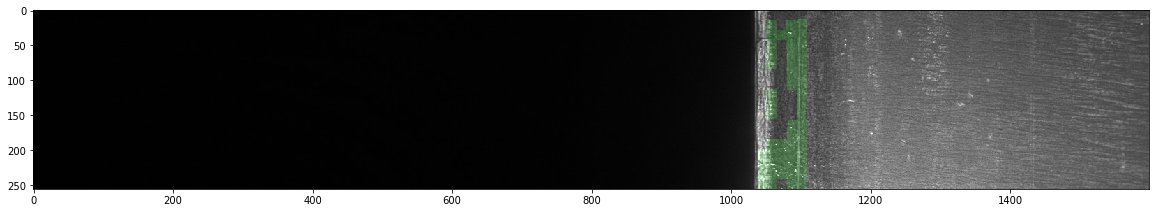

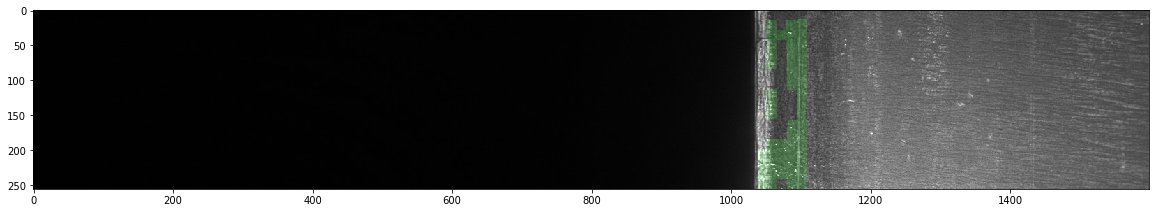

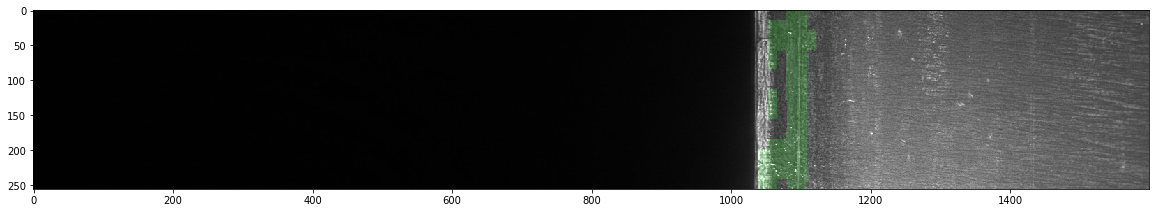

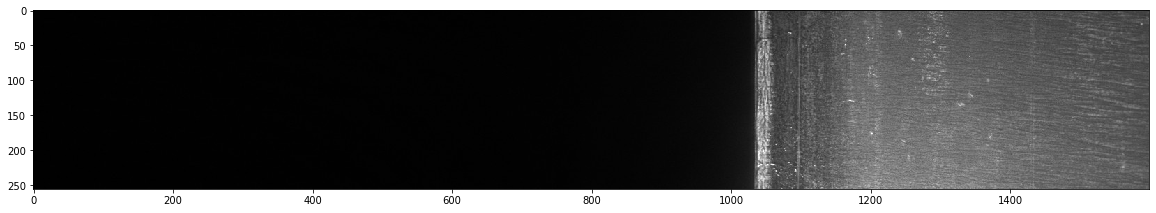

KeyboardInterrupt: 

In [129]:
classes=[]
for _, positive in res[~res['label']].iterrows():
    show(positive)
    plt.show()
    x = input('cls')
    plt.close()
    classes.append((positive.ImageId_ClassId, x))

In [128]:
classes

[('d5e8bbe9a.jpg_4', '0'), ('e8a1e41ef.jpg_3', '0')]